## Задача #1 (Линейный Лагранжев подход)

Количество энергии в начальный момент времени
$$ u(x,0) = \int_R e^{x^2} = \sqrt{\pi}$$

$$u(x,t) = \int_R \dfrac{1} {\sqrt{4*\alpha^2 t +1}}  e^{- \dfrac{x^2}{4\alpha t+1}}$$
Нормируем $u(x,0)$: $\int_R u(x,0)/\sqrt{\pi} = 1$, $R = [a,b]$, $a = -b = 2\pi$

In [79]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

from scipy.stats import gaussian_kde

In [80]:
# Заданная функция плотности
def phi(x):
    return np.exp(-(x)**2) #/  np.sqrt(np.pi)

def u(x):
    return np.exp(-(x)**2/(4 * alpha * t + 1)) / np.sqrt(4 * alpha**2 * t + 1)

In [81]:
# Генерация случайных величин методом принятия-отказа
def rejection_sampling(n, a, b):
    max_y = max(phi(x_vals))

    samples = []
    while len(samples) < n:
        x_proposal = np.random.uniform(a, b)
        y_proposal = np.random.uniform(0, max_y)

        if y_proposal <= phi(x_proposal):
            samples.append(x_proposal)

    return np.array(samples)

In [82]:
def error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [83]:
t = 1
alpha = 0.5

a = -4*np.pi
b = 4*np.pi
N = 100000
num_bins = 100

x_vals = np.linspace(a, b, N)

In [84]:
print(quad(phi, a, b), end=' ')

print(np.sqrt(np.pi), end='\n\n')

print(quad(u, a, b))

(1.7724538509055159, 2.2593264881035947e-10) 1.7724538509055159

(2.1708037636748028, 1.646579132461338e-09)


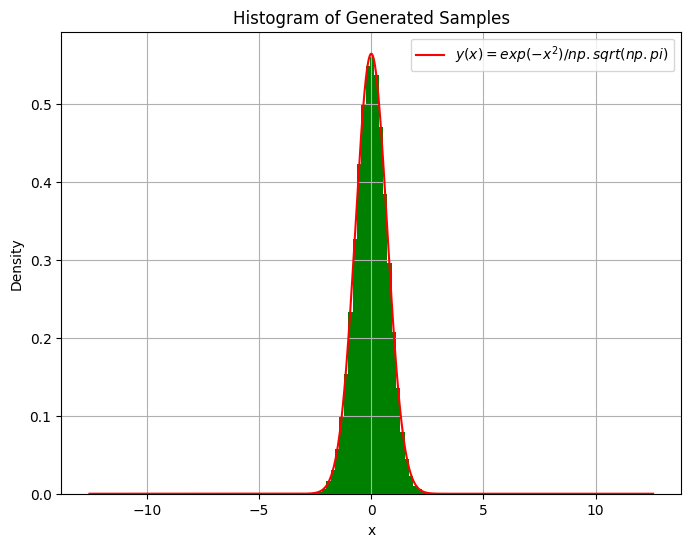

In [86]:
# Генерация случайных величин
x_0_i = rejection_sampling(N, a, b)

# Построение гистограммы сгенерированных значений
plt.figure(figsize=(8, 6))
plt.hist(x_0_i, bins=30, density=True, alpha=1, color='g')

# Построение графика функции плотности
plt.plot(x_vals, phi(x_vals)/np.sqrt(np.pi), label='$y(x) = exp(-x^2) / np.sqrt(np.pi)$', color='r')

plt.title('Histogram of Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('results/gen_1.png')

$$dx_i = \sigma dW$$
$$dx_i = \sqrt{2 \alpha} N(0, \sqrt{dt})$$
$$x^{t+1} = x^{t} + \sqrt{2 \alpha} N(0, \sqrt{dt})$$

In [87]:
T = 1000
M = 1
dt = t / T

x_new = np.copy(x_0_i)
for _ in range(T):
  x_new = x_new + np.random.normal(0, np.sqrt(2*alpha*dt), N)

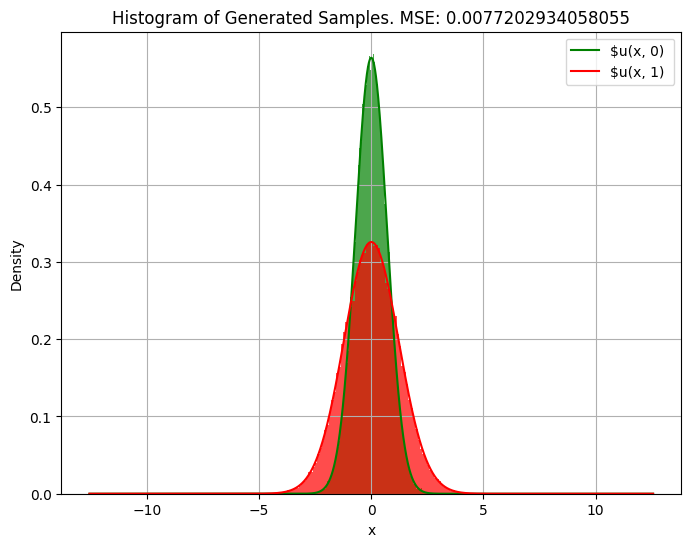

In [88]:
plt.figure(figsize=(8, 6))
plt.hist(x_0_i, bins=num_bins, density=True, alpha=0.7, color='g')

# Построение графика функции плотности
plt.plot(x_vals, phi(x_vals)/quad(phi, a, b)[0], label='$u(x, 0) ', color='g')
heights, bins, patches = plt.hist(x_new, bins=num_bins, density=True, alpha=0.7, color='r')
plt.plot(x_vals, u(x_vals)/quad(u, a, b)[0], label='$u(x, 1) ', color='r')

y = u(x_vals)/quad(u, a, b)[0]
y_reshaped = np.mean(y.reshape(num_bins, -1), axis=1)
y_reshaped.shape

plt.title(f'Histogram of Generated Samples. MSE: {error(heights, y_reshaped)}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/linear_lagrangian_1.png')

### KDE теория

Метод ядерной оценки (ядерная оценка плотности, KDE — Kernel Density Estimation) — это непараметрический способ оценки плотности вероятности случайной величины на основе данных выборки. Ядерная оценка позволяет аппроксимировать истинную функцию плотности без предположений о форме распределения.

Формула для одномерной ядерной оценки плотности выглядит так:
$$ \hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K \left( \frac{x - x_i}{h} \right). $$

Где:
- $\hat{f}(x)$ — оценка плотности в точке \( x \),
- $ n $ — количество данных,
- $ x_i $ — наблюдения из выборки,
- $ K $ — ядро (функция, обычно симметричная и положительно определённая),
- $ h $ — ширина окна (параметр сглаживания).


Часто используются такие ядра, как Гауссово, Епанечниково или прямоугольное. Ширина окна контролирует степень сглаживания:
- маленькое значение $h$ прииводит к более детализированной оценке, но может вызвать шум,
- тогда как слишком большое $h$ задаёт слишком сглаженную оценку.

KDE полезен для визуализации распределения данных и построения плотности для задач статистики и машинного обучения.го обучения.бучения.

Для метода ядерной оценки плотности (KDE) можно использовать разные виды ядерных функций. Основные типы ядер:

1. **Гауссово ядро**:
   $$
   K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
   $$
   Это самое популярное ядро, поскольку оно непрерывное и имеет гладкие края.

2. **Епанечниково ядро**:
   $$
   K(u) = \frac{3}{4}(1 - u^2), \quad \text{для } |u| \leq 1
   $$
   Ядро с конечной поддержкой. Оно оптимально с точки зрения минимизации квадратичной ошибки.

3. **Квартическое (биометрик) ядро**:
   $$
   K(u) = \frac{15}{16}(1 - u^2)^2, \quad \text{для } |u| \leq 1
   $$
   Похоже на Епанечниково, но имеет более плавную форму.

4. **Треугольное ядро**:
   $$
   K(u) = 1 - |u|, \quad \text{для } |u| \leq 1
   $$
   Линейно уменьшается до нуля, простое по форме.

5. **Прямоугольное (равномерное) ядро**:
   $$
   K(u) = \frac{1}{2}, \quad \text{для } |u| \leq 1
   $$
   Одно из самых простых ядер, но с резкими границами.

6. **Лапласовское ядро**:
   $$
   K(u) = \frac{1}{2} e^{-|u|}
   $$
   Подходит для данных с тяжелыми хвостами.

7. **Логистическое ядро**:
   $$
   K(u) = \frac{1}{e^u + 2 + e^{-u}}
   $$
   Напоминает форму логистической функции, сглаживающее ядро.

Каждое ядро имеет свои особенности и выбирается в зависимости от задачи и особенностей данных.

Выбор ширины окна $ h $ (или параметра сглаживания) в методе ядерной оценки плотности (KDE) является ключевым, поскольку от этого зависит качество аппроксимации плотности. Если $ h $ слишком мал, оценка будет слишком "зазубренной" и подверженной шуму (недостаточное сглаживание). Если $ h $ слишком велик, оценка будет слишком гладкой, что приведет к потере важных деталей (переизбыточное сглаживание).

Вот несколько подходов для выбора $ h $:

### 1. **Правило серебряной ложки (Silverman's rule of thumb)**:
Один из самых популярных эмпирических методов. Формула для одномерного случая:

$$
h = 0.9 \cdot \min(\hat{\sigma}, \frac{IQR}{1.34}) \cdot n^{-1/5}
$$

Где:
- $ \hat{\sigma} $ — выборочная стандартная ошибка,
- $ IQR $ — интерквартильный размах (разница между 75-м и 25-м процентилями),
- $ n $ — количество данных.

Это правило даёт хорошую начальную оценку $ h $ для многих задач.

### 2. **Критерий перекрёстной проверки (Cross-Validation)**:
Этот метод основан на минимизации ошибки оценки плотности через кросс-валидацию. Обычно используется **leave-one-out** кросс-валидация: оценка плотности вычисляется по всем точкам, кроме одной, и ошибка минимизируется по всем наблюдениям.

$$
h_{\text{CV}} = \arg\min_h \sum_{i=1}^{n} \left( f_{-i}(x_i) - f_{\text{true}}(x_i) \right)^2
$$

Где $ f_{-i}(x_i) $ — оценка плотности на $ x_i $, исключив её из набора данных.

### 3. **Правило Шотта (Scott's rule)**:
Похоже на правило серебряной ложки, но отличается коэффициентом:

$$
h = 1.06 \cdot \hat{\sigma} \cdot n^{-1/5}
$$

Используется, когда данные следуют нормальному распределению.

### 4. **Адаптивная ядерная оценка**:
Иногда полезно использовать переменный параметр $ h $, адаптированный к плотности данных в разных областях. В областях с высокой плотностью используется меньшее значение $ h $, а в областях с низкой плотностью — большее.

### 5. **Оптимизация вероятности**:
Этот метод выбирает $ h $, максимизируя правдоподобие оценки плотности на основе имеющихся данных.

$$
h_{\text{MLE}} = \arg\max_h \prod_{i=1}^{n} \hat{f}(x_i; h)
$$

### Практические советы:
- В реальных задачах можно начать с **правила серебряной ложки** или **правила Шотта** для первичной оценки.
- Для более точного выбора используют **кросс-валидацию**.
- Для данных с неравномерной плотностью **адаптивная ядерная оценка** может давать лучшие результаты.

In [89]:
#Ядерная оценка
def apr_f(x_point, x_vals):
    # Вычисление стандартного отклонения и ширины окна
    sigma = np.std(x_vals, ddof=1)
    n = len(x_vals)
    h = 1.06 * sigma * n ** (-1/5) #Scott's rule

    # Определение треугольного ядра
    def k(u):
        return np.where(np.abs(u) <= 1, 1 - np.abs(u), 0)


    # Преобразование входных данных и применение ядра
    u = (x_point - x_vals) / h
    kernel_values = k(u)

    # Оценка плотности
    return np.sum(kernel_values) / (n * h)

In [90]:
x_vals = np.linspace(a, b, 100)

f_apr = np.array([apr_f(x, x_new) for x in x_vals])
f_0_apr = np.array([apr_f(x, x_0_i) for x in x_vals])

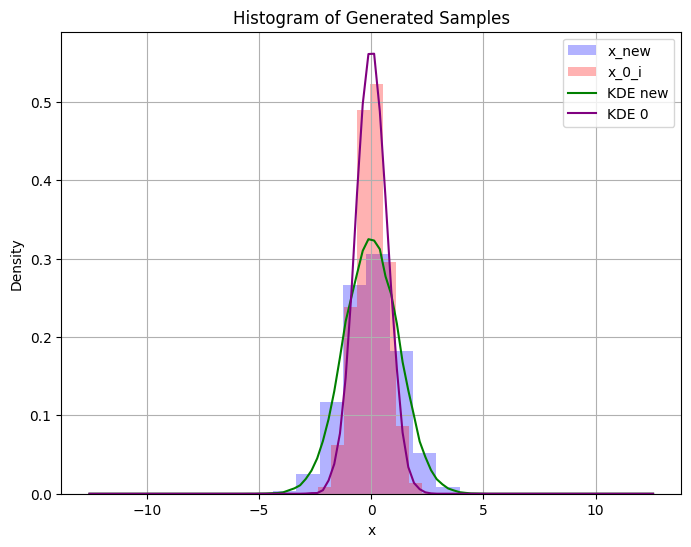

In [92]:
plt.figure(figsize=(8, 6))
plt.hist(x_new, bins=10, density=True, alpha=0.3, color='b', label='x_new')
plt.hist(x_0_i, bins=10, density=True, alpha=0.3, color='r', label='x_0_i')
#plt.plot(x_vals, phi(x_vals), label='$u(x, 0) ', color='g')
plt.plot(x_vals, f_apr, label='KDE new', color='g')
plt.plot(x_vals, f_0_apr, label='KDE 0', color='purple')

#plt.plot(x_vals, u(x_vals), label='$u(x, 1) ', color='r')


plt.title('Histogram of Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/kde_interpolation_1.png')

In [ ]:
from scipy.stats import gaussian_kde

x_v = np.linspace(a, b, 1000)
kde_f = gaussian_kde(x_0_i)
kde_u = gaussian_kde(x_new)
apr_f_0 = kde_f(x_v)
apr_f = kde_u(x_v)

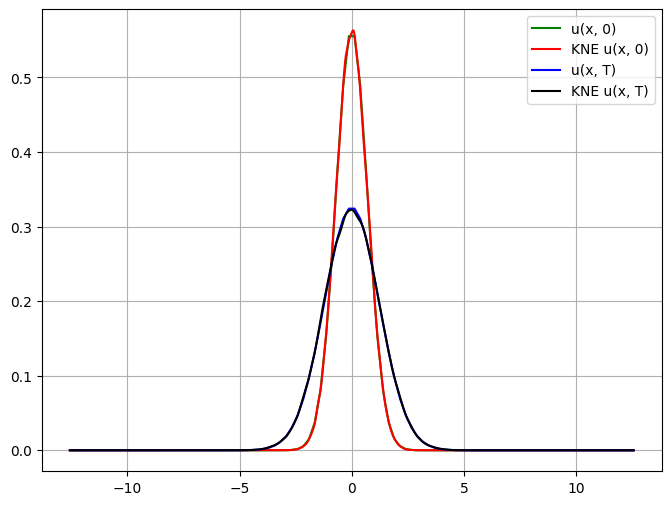

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(x_vals, phi(x_vals)/quad(phi, a, b)[0], label='u(x, 0)', color='g')
plt.plot(x_v, apr_f_0, label='KNE u(x, 0)', color='red')
plt.plot(x_vals, u(x_vals)/quad(u, a, b)[0], label='u(x, T)', color='blue')
plt.plot(x_v, apr_f, label='KNE u(x, T)', color='black')

plt.legend()
plt.grid(True)
plt.show()

## Задача #2 (+ KDE)

In [96]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

from scipy.stats import gaussian_kde

In [97]:
t = 1
alpha = 0.5

a = -2*np.pi
b = 2*np.pi

a = 0
b = 2*b

num_bins = 100

N = 10000

x_vals = np.linspace(a, b, N)
t_vals = np.linspace(a, b, N)

In [98]:
# Заданная функция плотности
def phi(x):
    return np.exp(-x**2)*np.sin(x)

def u(x):
    return np.exp(-(4*x**2 + t) / (4 * (1 + t))) * np.sin(x / (1 + t)) / np.sqrt(1 + t)

# Генерация случайных величин методом принятия-отказа
def rejection_sampling(n, a, b):
    max_y = max(phi(x_vals))

    samples = []
    while len(samples) < n:
        x_proposal = np.random.uniform(a, b)
        y_proposal = np.random.uniform(0, max_y)

        if y_proposal <= phi(x_proposal):
            samples.append(x_proposal)

    return np.array(samples)

In [99]:
def error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Количество энергии в начальный момент времени
$$ u(x,0) = \phi(x) = e^{-x^2} \sin{x}. $$

Где общее уравнение задается следующим образом:

$$u(x,t) = e^{\frac{-(4x^2 + t)}{4(1 + t)}} \frac{\sin{\frac{x}{1 + t}}}{1 + t} $$
Нормируем $u(x,0)$: $\int_R u(x,0) / \rho = 1$, $R = [0, 2b]$, $b = 2\pi$. Найдем коэффициент нормализации $\rho$.

In [100]:
rho = quad(phi, a, b)[0]
print(rho)

rho_u = quad(u, a, b)[0]
print(rho_u)

0.4244363835020223
0.28726382941238277


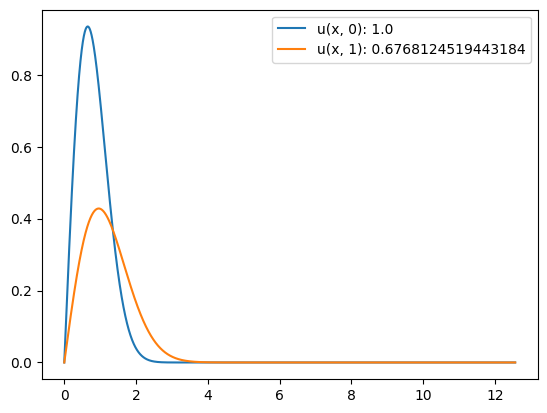

In [187]:
plt.plot(x_vals, phi(x_vals)/rho, label=f"u(x, 0): {quad(phi, a, b)[0] / rho}")
plt.plot(x_vals, u(x_vals)/rho, label=f"u(x, 1): {quad(u, a, b)[0] / rho}")

plt.legend()
plt.show()

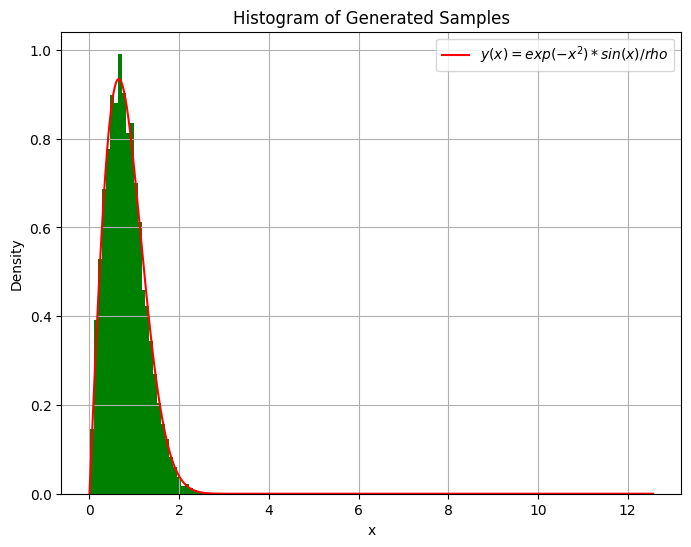

In [102]:
# Генерация случайных величин
x_0_i = rejection_sampling(N, a, b)

# Построение гистограммы сгенерированных значений
plt.figure(figsize=(8, 6))
plt.hist(x_0_i, bins=30, density=True, alpha=1, color='g')

# Построение графика функции плотности
plt.plot(x_vals, phi(x_vals)/rho, label='$y(x) = exp(-x^2) * sin(x) / rho$', color='r')

plt.title('Histogram of Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('results/gen_2.png')
# plt.show()

In [103]:
T = 1000
M = 1
dt = t / T
alpha = 0.5

x_new = np.copy(x_0_i)
for _ in range(T):
    x_new = x_new + np.random.normal(0, np.sqrt(dt/2), len(x_new))
    # x_new = np.where(x_new > 0, x_new, 0)
    x_new = [x for x in x_new if x >= 0]

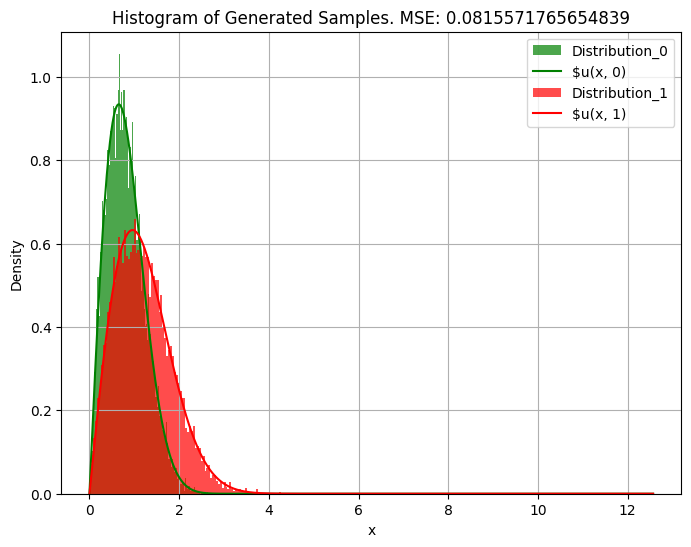

In [104]:
plt.figure(figsize=(8, 6))
plt.hist(x_0_i, bins=num_bins, density=True, alpha=0.7, color='g', label='Distribution_0')

# Построение графика функции плотности
plt.plot(x_vals, phi(x_vals)/rho, label='$u(x, 0) ', color='g')
heights, bins, patches = plt.hist(x_new, bins=num_bins, density=True, alpha=0.7, color='r', label='Distribution_1')
plt.plot(x_vals, u(x_vals)/rho_u, label='$u(x, 1) ', color='r')

y = u(x_vals)/rho_u
y_reshaped = np.mean(y.reshape(num_bins, -1), axis=1)

plt.title(f'Histogram of Generated Samples. MSE: {error(y_reshaped, heights)}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/linear_lagrangian_2.png')

### Gaussian KDE (scipy.stats)

In [ ]:
kde_f = gaussian_kde(x_0_i)
kde_u = gaussian_kde(x_new)

apr_f_0 = kde_f(x_vals)
apr_f = kde_u(x_vals)

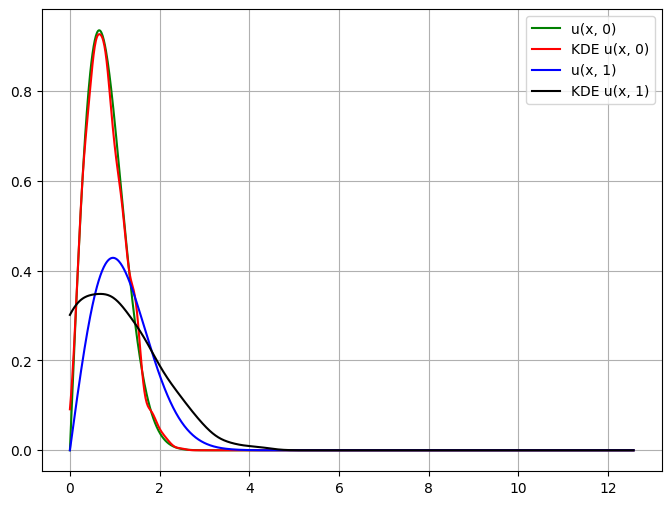

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(x_vals, phi(x_vals)/rho, label='u(x, 0)', color='g')
plt.plot(x_vals, apr_f_0, label='KDE u(x, 0)', color='red')
plt.plot(x_vals, u(x_vals)/rho, label='u(x, 1)', color='blue')
plt.plot(x_vals, apr_f, label='KDE u(x, 1)', color='black')

plt.legend()
plt.grid(True)
plt.show()

### KDE (own)

In [105]:
#Ядерная оценка
def apr_f(x_point, x_vals):
    # Вычисление стандартного отклонения и ширины окна
    sigma = np.std(x_vals, ddof=1)
    n = len(x_vals)
    h = 1.06 * sigma * n ** (-1/5)

    # Определение треугольного ядра
    def k(u):
        return np.where(np.abs(u) <= 1, 1 - np.abs(u), 0)


    # Преобразование входных данных и применение ядра
    u = (x_point - x_vals) / h
    kernel_values = k(u)

    # Оценка плотности
    return np.sum(kernel_values) / (n * h)

In [106]:
f_0_apr = np.array([apr_f(x, x_0_i) for x in x_vals])
f_apr = np.array([apr_f(x, x_new) for x in x_vals])

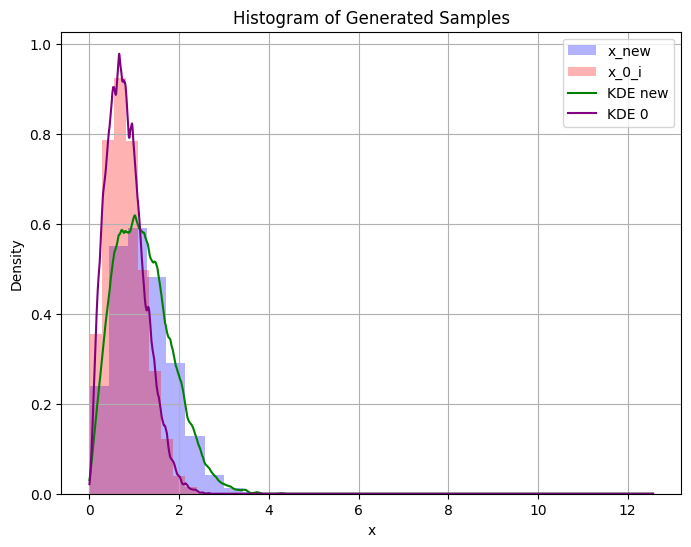

In [108]:
plt.figure(figsize=(8, 6))
plt.hist(x_new, bins=10, density=True, alpha=0.3, color='b', label='x_new')
plt.hist(x_0_i, bins=10, density=True, alpha=0.3, color='r', label='x_0_i')
#plt.plot(x_vals, phi(x_vals), label='$u(x, 0) ', color='g')
plt.plot(x_vals, f_apr, label='KDE new', color='g')
plt.plot(x_vals, f_0_apr, label='KDE 0', color='purple')

#plt.plot(x_vals, u(x_vals), label='$u(x, 1) ', color='r')


plt.title('Histogram of Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/kde_interpolation_2.png')

### General KDE

#### Выбор ширины окна (h)

In [109]:
def Silverman_h(x_vals):
    sigma = np.std(x_vals, ddof=1)
    n = len(x_vals)

    Q1 = np.percentile(x_vals, 25)
    Q3 = np.percentile(x_vals, 75)
    IQR = Q3 - Q1

    h = 0.9 * min(sigma, IQR/1.34) * n ** (-1/5)

    return h

In [110]:
def Scott_h(x_vals):
    sigma = np.std(x_vals, ddof=1)
    n = len(x_vals)

    h = 1.06 * sigma * n ** (-1/5)

    return h

#### Выбор ядра K(u)

In [111]:
def Gaussian_k(u): # Это самое популярное ядро, поскольку оно непрерывное и имеет гладкие края.
    return np.exp(1)**(-u**2 / 2) / np.sqrt((2 * np.pi))

In [112]:
def Epanechnikov_k(u): # Ядро с конечной поддержкой. Оно оптимально с точки зрения минимизации квадратичной ошибки.
    return np.where(np.abs(u) <= 1, 3/4 * (1 - u**2), 0)

In [113]:
def Quartic_k(u): # Похоже на Епанечниково, но имеет более плавную форму.
    return np.where(np.abs(u) <= 1, 3/4 * (1 - u**2)**2, 0)

In [114]:
def Triangle_k(u): # Линейно уменьшается до нуля, простое по форме.
    return np.where(np.abs(u) <= 1, 15/16 * (1 - u**2), 0)

In [115]:
def Rectangular_k(u): # Одно из самых простых ядер, но с резкими границами.
    return np.where(np.abs(u) <= 1, 1/2, 0)

In [116]:
def Laplace_k(u): # Подходит для данных с тяжелыми хвостами.
    return np.exp(-np.abs(u)) / 2

In [117]:
def Logistics_k(u): # Напоминает форму логистической функции, сглаживающее ядро.
    return 1 / (np.exp(u) + 2 + np.exp(-u))

#### Метод ядерной оценки (KDE)
Ядерная оценка плотност (Kernel Density Estimation)

In [118]:
from unittest.mock import patch

def calculate_f(x_point, x_vals, select_h: int, select_kernel: int):
    n = len(x_vals)

    # select_h = int(input("Select type of h 1-Silverman, 2-Scott:"))
    # while select_h not in (1, 2):
    #     print("You have selected an inappropriate window width. Select one more time!")
        # select_h = int(input("Select type of h 1-Silverman, 2-Scott:"))

    h = Silverman_h(x_vals) if select_h == 1 else Scott_h(x_vals)
    u = (x_point - x_vals) / h

    # select_kernel = int(input("Select type of kernel 1-Gaussian\n, 2-Epanechnikov\n, 3-Quartic\n, 4-Triangle\n, 5-Rectangular\n, 6-Laplace\n, 7-Logistics:"))
    # while select_kernel not in (1, 2, 3, 4, 5, 6, 7):
    #     print("You have selected an inappropriate kernel type. Select one more time!")
    #     select_kernel = int(input("Select type of kernel 1-Gaussian\n, 2-Epanechnikov\n, 3-Quartic\n, 4-Triangle\n, 5-Rectangular\n, 6-Laplace\n, 7-Logistics:"))

    if select_kernel == 1:
        kernel_values = Gaussian_k(u)
    elif select_kernel == 2:
        kernel_values = Epanechnikov_k(u)
    elif select_kernel == 3:
        kernel_values = Quartic_k(u)
    elif select_kernel == 4:
        kernel_values = Triangle_k(u)
    elif select_kernel == 5:
        kernel_values = Rectangular_k(u)
    elif select_kernel == 6:
        kernel_values = Laplace_k(u)
    else:
        kernel_values = Logistics_k(u)

    return np.sum(kernel_values) / (n * h)

#### Implementation

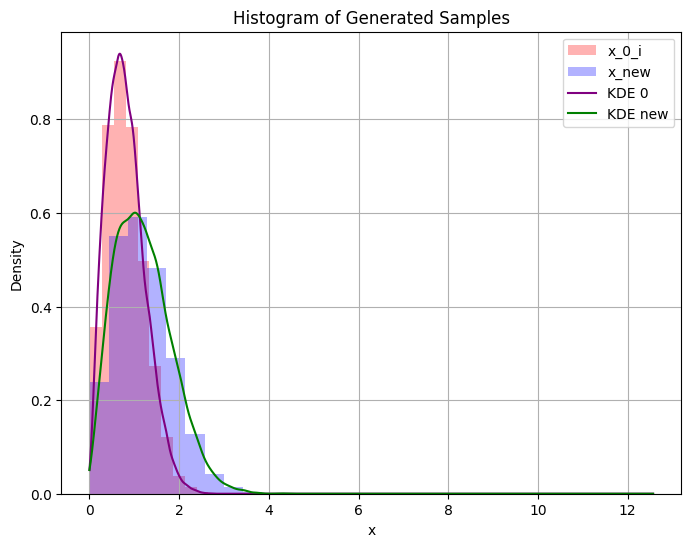

In [120]:
# Silverman's rule and Gaussian kernel
h_type = 1
kernel_type = 1

f_0_apr = np.array([calculate_f(x, x_0_i, h_type, kernel_type) for x in x_vals])
f_apr = np.array([calculate_f(x, x_new, h_type, kernel_type) for x in x_vals])

plt.figure(figsize=(8, 6))
plt.hist(x_0_i, bins=10, density=True, alpha=0.3, color='r', label='x_0_i')
plt.hist(x_new, bins=10, density=True, alpha=0.3, color='b', label='x_new')
#plt.plot(x_vals, phi(x_vals), label='$u(x, 0) ', color='g')
plt.plot(x_vals, f_0_apr, label='KDE 0', color='purple')
plt.plot(x_vals, f_apr, label='KDE new', color='g')

plt.title('Histogram of Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/kde_interpol(Silverman_rule_and_Gaussian_kernel)_2.png')

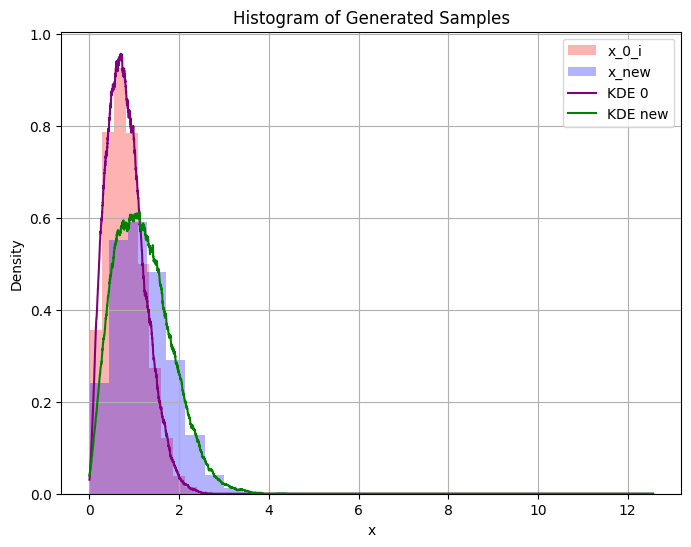

In [121]:
# Scott's rule and Rectangular kernel
h_type = 2
kernel_type = 5

f_0_apr = np.array([calculate_f(x, x_0_i, h_type, kernel_type) for x in x_vals])
f_apr = np.array([calculate_f(x, x_new, h_type, kernel_type) for x in x_vals])

plt.figure(figsize=(8, 6))
plt.hist(x_0_i, bins=10, density=True, alpha=0.3, color='r', label='x_0_i')
plt.hist(x_new, bins=10, density=True, alpha=0.3, color='b', label='x_new')
#plt.plot(x_vals, phi(x_vals), label='$u(x, 0) ', color='g')
plt.plot(x_vals, f_0_apr, label='KDE 0', color='purple')
plt.plot(x_vals, f_apr, label='KDE new', color='g')

plt.title('Histogram of Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/kde_interpol(Scott_rule_and_Rectangular_kernel)_2.png')

## Задача #3 (+ источник)

$$\frac{\partial u}{\partial t} = a^2 \frac{\partial^2 u}{\partial x^2} + f(x, t),$$
$$u(x, 0) = \phi(x) = e^{-x^2},$$
$$f(x, t) = f(t) = sin(t).$$

In [122]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

from scipy.stats import gaussian_kde

In [123]:
def rejection_sampling(n, a, b, f, weight=1):
    # norma_phi = quad(f, a, b)[0]
    # normalized_phi = lambda x: f(x) / norma_phi

    # max_y = max(normalized_phi(x_vals))
    max_y = max(f(x_vals))

    samples = []
    while len(samples) < n:
        x_proposal = np.random.uniform(a, b)
        y_proposal = np.random.uniform(0, max_y / weight)

        if y_proposal <= f(x_proposal) / weight:              # normalized_phi(x_proposal)
            samples.append(x_proposal)

    return np.array(samples)

In [124]:
def my_hist(x_values, bins, mass):

    counts, bin_edges = np.histogram(x_values, bins=bins)
    heights = counts * mass

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    width = bin_centers[1] - bin_centers[0]
    heights /= width

    return bin_centers, heights, width

In [125]:
def RY_hist(positions, num_bins, weights = 1):
    # Определим диапазон значений
    min_pos = np.min(positions)
    max_pos = np.max(positions)
    # Шаг бинов
    bin_width = (max_pos - min_pos) / num_bins
    # Создание массивов для бинов и взвешенных частот
    bins = np.linspace(min_pos, max_pos, num_bins + 1)
    counts = np.zeros(num_bins)
    # Подсчёт взвешенных частиц в каждом окне
    for i, pos in enumerate(positions):
        # Найдем индекс нужного бина
        bin_index = int((pos - min_pos) / bin_width)
        if bin_index == num_bins:  # граничный случай
            bin_index -= 1
        # Учитываем вес частицы
        counts[bin_index] += 1
    counts = counts * weights / bin_width
    # Возвращаем промежутки и высоты гистограммы
    return bins, counts

In [126]:
def error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [127]:
t = 1
T = 100
alpha = 0.5

a = -2*np.pi
b = 2*np.pi
N = 10000

num_bins = 50

K = 50

# a = 0
# b = np.pi

x_vals = np.linspace(a, b, N)
t_vals = np.linspace(0, t, T)

In [128]:
norma_phi = quad(lambda x: np.exp(-x**2), a, b)[0]
# norma_u = quad(u, a, b)[0]

phi = lambda x: np.exp(-x**2)              # / norma_phi
f = lambda t: np.sin(t)                    # / norma_phi
df = lambda t: 2 * b * f(t)                # (b - a) * f(t)

def U(x, t):
    return (1 - np.cos(t) + np.exp(-(x**2) / (1 + 4 * alpha**2 * t)) / np.sqrt(1 + 4 * alpha**2 * t))

In [129]:
phi = lambda x: np.exp(-x**2) / norma_phi              # / norma_phi
f = lambda t: np.sin(t) / norma_phi                    # / norma_phi
df = lambda t: 2 * b * f(t)                            # (b - a) * f(t)

def U(x, t):
    return (1 - np.cos(t) + np.exp(-(x**2) / (1 + 4 * alpha**2 * t)) / np.sqrt(1 + 4 * alpha**2 * t)) / norma_phi

In [130]:
y = np.array([phi(x) for x in x_vals])
u = np.array([U(x, 1) for x in x_vals])

In [131]:
print(f"Проверка сходимости:")
weight_of_t = quad(df, 0, t)[0]
weight_of_phi  = quad(phi, a, b)[0]
print(weight_of_phi + weight_of_t)
print(quad(lambda x: U(x, t), a, b)[0])

Проверка сходимости:
4.259171792865607
4.259171792533902


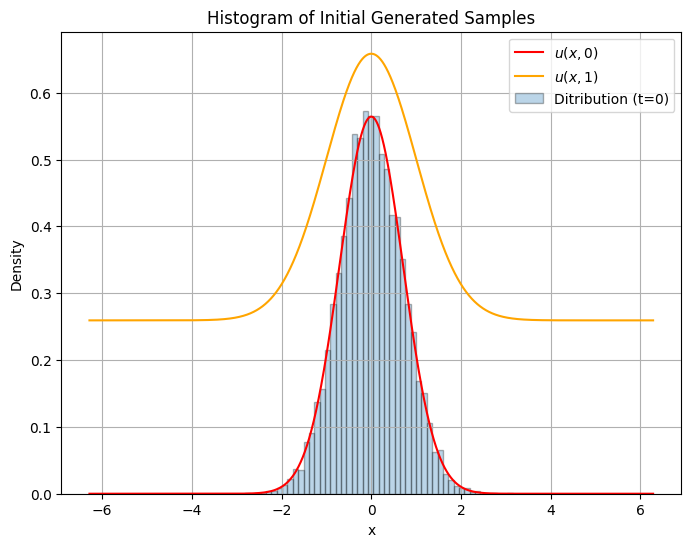

In [132]:
# Генерация случайных величин
x_0_i = rejection_sampling(N, a, b, phi)

# Построение гистограммы сгенерированных значений
plt.figure(figsize=(8, 6))
# plt.hist(x_0_i, bins=30, density=True, alpha=1, color='g', edgecolor='black', label='Initial Samples')
bins_0, heights_0, width_0 = my_hist(x_0_i, num_bins, weight_of_phi / N)
plt.bar(bins_0, heights_0, width=width_0, alpha=0.3, align='center', edgecolor='black', label='Ditribution (t=0)')

# Построение графика функции плотности
plt.plot(x_vals, y, label='$u(x, 0)$', color='r')
plt.plot(x_vals, u, label='$u(x, 1)$', color='orange')

plt.title('Histogram of Initial Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/gen_3.png')

In [133]:
T = 100
M = 10
dt = t / T

t_curr = 0

In [134]:
x_mas_new = []
for i in range(M):
    t_curr = 0
    x_new = np.copy(x_0_i)

    for _ in range(T):
        t_curr += dt
        x_new = x_new + np.random.normal(0, alpha*np.sqrt(2*dt), len(x_new))

        w_dt = quad(df, t_curr - dt, t_curr)[0]

        mas_of_one_particle = weight_of_phi / N
        mas_dt = w_dt / mas_of_one_particle         # Грубый поиск массы в dt

        x_new = np.append(x_new, np.random.uniform(a, b, int(mas_dt)))

        # x_new = [x for x in x_new if x >= 0] # Поглощающая стенка

        for i in range(len(x_new)):            # Отражающие стенки
            if x_new[i] < a:
                x_new[i] = 2 * (a - x_new[i]) + x_new[i]
            elif x_new[i] > b:
                x_new[i] = x_new[i] - 2 * (x_new[i] - b)

    print(len(x_new))
    x_mas_new.append(x_new)

x_new_total = np.concatenate(x_mas_new)

42543
42543
42543
42543
42543
42543
42543
42543
42543
42543


In [135]:
print(len(x_new))
print(len(x_new_total))

42543
425430


In [136]:
print(len(x_new) * weight_of_phi / N)
print(len(x_new_total) * weight_of_phi / N / M)

print()

print(quad(lambda x: U(x, 1), a, b)[0])

4.254300000000001
4.2543000000000015

4.259171792533902


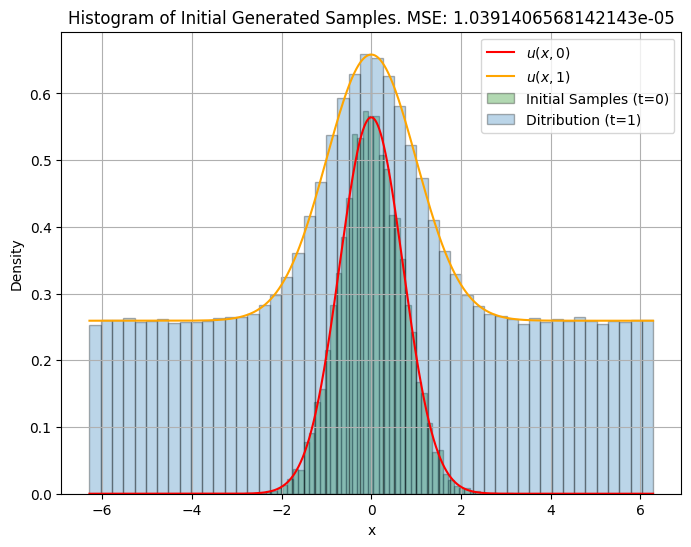

In [137]:
plt.figure(figsize=(8, 6))
# plt.hist(x_0_i, bins=30, density=True, alpha=0.3, color='g', label='Initial Samples')
bins_0, heights_0, width_0 = my_hist(x_0_i, num_bins, weight_of_phi / N)
plt.bar(bins_0, heights_0, width=width_0, alpha=0.3, color='green', align='center', edgecolor='black', label='Initial Samples (t=0)')

# Построение графика функции плотности
plt.plot(x_vals, y, label='$u(x, 0)$', color='red')
plt.plot(x_vals, u, label='$u(x, 1)$', color='orange')

# plt.hist(x_new_total, bins=30, density=False, alpha=0.3, color='red', label='Result Distribution')
bins, heights, width = my_hist(x_new_total, num_bins, weight_of_phi / N / M)
plt.bar(bins, heights, width=width, alpha=0.3, align='center', edgecolor='black', label='Ditribution (t=1)')

y_reshaped = np.mean(u.reshape(num_bins, -1), axis=1)

plt.title(f'Histogram of Initial Generated Samples. MSE: {error(y_reshaped, heights)}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/linear_lagrangian_3.png')

## Задача #4 (+ источник, №7)

$$\frac{\partial u}{\partial t} = a^2 \frac{\partial^2 u}{\partial x^2} + e^{α t}x(l-x),    0 < x < l,    t > 0,$$
$$u(x, 0) = \phi(x) = 0,$$
$$u(0, t) = u(l, t) = 0.$$

Тогда общее решение будет выглядеть следующим образом:
$$u(x, t) = -\frac{8l^4}{π^3} \sum_{k=0}^∞\frac{e^{-(\frac{πα(2k+1)}{l})^2t} - e^{αt}}{αl^2 + π^2a^2(2k+1)^2} \frac{\sin\frac{π(2k+1)}{l}x}{(2k+1)^3}.$$

При $\alpha < 0$ температра тела при $t → +\infty$ стремится к 0.


При $\alpha \ge 0$ температра тела при $t → +\infty$ зависит от времени по такому же закону, что и плотность распр. источника и сис. выходит на стационарный режим:

$$\lim_{t → +∞}e^{-\alpha t} u(x, t) = -\frac{8l^4}{π^3} \sum_{k=0}^∞\frac{\sin\frac{π(2k+1)}{l}x}{[αl^2 + π^2a^2(2k+1)^2](2k+1)^3}.$$

In [150]:
def phi(x):
  return 0.0

def f(x, t):
  # return np.exp(alpha * t) * x * (l - x)
    return np.exp(alpha * t)

def df(t):
  return 1/6 * l**3 * np.exp(alpha * t)


def U7(x, t, k_limit, l):
  result = 0
  for k in range(k_limit):
    term = (np.exp(-((np.pi * alpha * (2 * k + 1) / l) ** 2) * t) - np.exp(alpha * t)) / (alpha * l**2 + (np.pi**2) * a2 * (2 * k + 1)**2) * np.sin(np.pi * (2 * k + 1) / l * x) / (2 * k + 1)**3
    result += term

    return -(8 * l**4 / np.pi**3) * result

In [151]:
t_last = 1
T = 100
a2 = 1

alpha = 1

# b = 2*np.pi
# a = -b
# l = np.pi
l = 1.0
N = 10000

num_bins = 50

K = 10

x_vals = np.linspace(0, l, N)

In [152]:
weight_of_t = quad(df, 0, 1)[0]
weight_of_phi  = quad(phi, 0, l)[0]

print (weight_of_t, weight_of_phi)

0.2863803047431742 0.0


In [153]:
weight_0 = quad(lambda x: f(x, 0), 0, l)[0]
print(weight_0)

weight_last = quad(lambda x: U7(x, t_last, K, l), 0, l)[0]
print(weight_last)

1.0
0.04107645650409583


In [154]:
quad(df, 0, 1)[0]

0.2863803047431742

In [155]:
y = np.array([U7(x, 0, K, l) for x in x_vals])
u = np.array([U7(x, t_last, K, l) for x in x_vals])

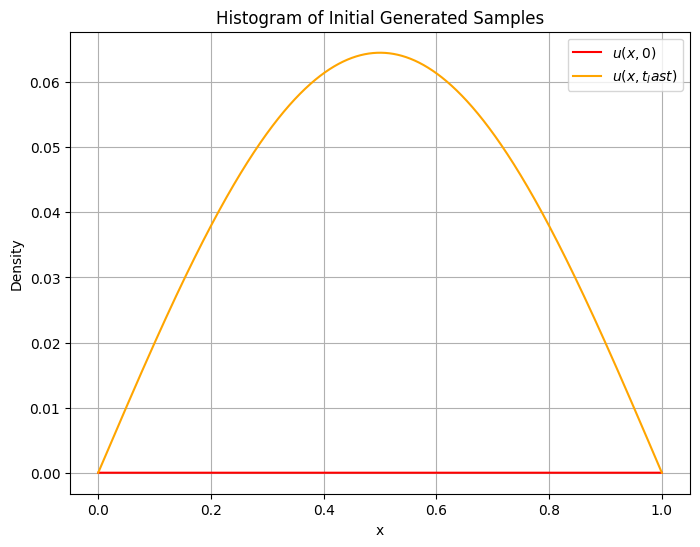

In [156]:
# Генерация случайных величин
# x_0_i = rejection_sampling(N, 0, l, lambda x: f(x, 0))
x_0_i = []

# Построение гистограммы сгенерированных значений
plt.figure(figsize=(8, 6))
# plt.hist(x_0_i, bins=30, density=True, alpha=1, color='g', edgecolor='black', label='Initial Samples')
# bins_0, heights_0, width_0 = my_hist(x_0_i, 30, weight_0 / N)
# plt.bar(bins_0, heights_0, width=width_0, alpha=0.3, align='center', edgecolor='black', label='Ditribution (t=0)')

# Построение графика функции плотности
plt.plot(x_vals, y, label='$u(x, 0)$', color='r')
plt.plot(x_vals, u, label='$u(x, t_last)$', color='orange')

plt.title('Histogram of Initial Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('results/gen_4.png')

In [157]:
T = 100
M = 30
dt = t_last / T

t_curr = 0

In [158]:
x_mas_new = []
for i in range(M):
    t_curr = 0
    x_new = np.copy(x_0_i)

    for _ in range(T):
        t_curr += dt
        
        x_new = x_new + np.random.normal(0, alpha*np.sqrt(2*dt), len(x_new))

        w_dt = quad(df, t_curr - dt, t_curr)[0]

        mas_of_one_particle = 1 / N       # weight_0 / N
        mas_dt = w_dt / mas_of_one_particle         # Грубый поиск массы в dt
        # print(mas_dt)
        # mas_dt = abs(mas_dt)

        x_new = np.append(x_new, rejection_sampling(mas_dt, 0, l, lambda x: x*(l - x)))
        
        # x_new = np.append(x_new, np.random.uniform(0, l, int(mas_dt)))

        x_new = [x for x in x_new if 0 <= x <= l] # Поглощающая стенка

        # for i in range(len(x_new)):            # Отражающие стенки
        #     if x_new[i] < a:
        #         x_new[i] = 2 * (a - x_new[i]) + x_new[i]
        #     elif x_new[i] > b:
        #         x_new[i] = x_new[i] - 2 * (x_new[i] - b)

    print(len(x_new))
    x_mas_new.append(x_new)

x_new_total = np.concatenate(x_mas_new)

613
616
628
587
586
579
589
613
560
584
583
585
610
587
604
611
595
603
605
594
567
594
588
572
589
598
583
600
639
596


In [159]:
print(len(x_new))
print(len(x_new_total))

596
17858


In [160]:
# print(len(x_new) * 1 / N)
# print(len(x_new_total) * 1 / N / M)

# print()

# print(quad(lambda x: U7(x, t_last, K, l), 0, l)[0])

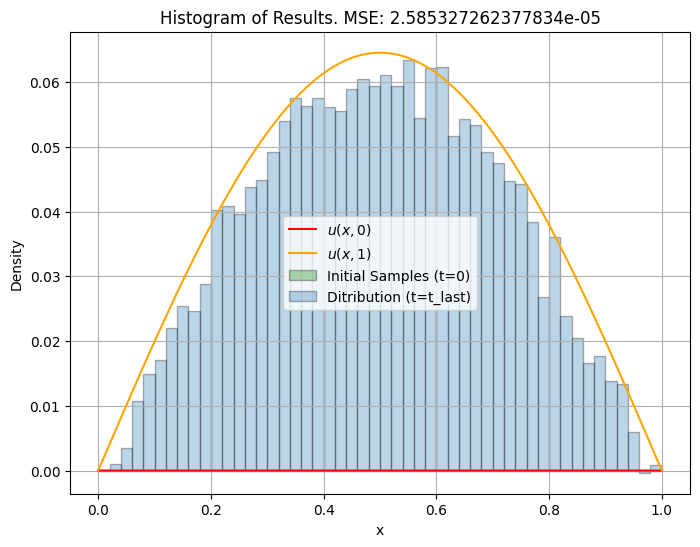

In [162]:
plt.figure(figsize=(8, 6))
# plt.hist(x_0_i, bins=num_bins, density=True, alpha=0.3, color='g', label='Initial Samples')
bins_0, heights_0, width_0 = my_hist(x_0_i, num_bins, 1 / N)
plt.bar(bins_0, heights_0, width=width_0, alpha=0.3, color='green', align='center', edgecolor='black', label='Initial Samples (t=0)')

# Построение графика функции плотности
plt.plot(x_vals, y, label='$u(x, 0)$', color='red')
plt.plot(x_vals, u, label='$u(x, 1)$', color='orange')

# plt.hist(x_new_total, bins=num_bins, density=False, alpha=0.3, color='red', label='Result Distribution')
bins, heights, width = my_hist(x_new_total, num_bins, 1 / N / M)
heights = heights - min(heights[0], heights[-1])

plt.bar(bins, heights, width=width, alpha=0.3, align='center', edgecolor='black', label='Ditribution (t=t_last)')
# heights, bins, patches = plt.hist(x_new_total, bins=num_bins, density=True, alpha=0.3, color='r', label='Original')
# heights_scaled = heights * weight_last
# for i, patch in enumerate(patches):
#     patch.set_height(heights_scaled[i])

# plt.ylim(0, 0.2)

y_reshaped = np.mean(u.reshape(num_bins, -1), axis=1)
plt.title(f'Histogram of Results. MSE: {error(heights, y_reshaped)}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()
# plt.draw()
plt.savefig('results/linear_lagrangian_4.png')

# Задача #5 (Нелинейная задача теплопроводности)

$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}(k(u) \frac{\partial u}{\partial x}),$$
$$k(u) = u^2,$$
$$u(x, 0) = \phi(x).$$

Решение методом Лагранжа будет выглядеть следующим образом:
$$x_i = x_i + \sigma dW,$$
где
- $dW \sim \mathcal{N}(0, \sqrt{dt})$;
- $\sigma$ определяется из основного уравнения, а именно:
$$\frac{\partial u}{\partial t} = \frac{1}{2}\frac{\partial^2 (\sigma^2 u)}{\partial x^2},$$
тем самым $\sigma^2 = \frac{2}{3} u^2$.

In [163]:
import numpy as np
import matplotlib.pyplot as plt

import math
from math import ceil

from scipy import integrate

In [164]:
def progonka(a, b, c, f, bound_left, bound_right):
    """
    Метод прогонки для решения системы линейных уравнений Ax = f,
    где a, b, c - диагональные элементы матрицы A, f - вектор правых частей.

    :param a: Поддиагональ
    :param b: Главная диагональ
    :param c: Наддиагональ
    :param f: Вектор правых частей
    :param bound_conditions: Пара граничных условий
    :return: Вектор решения result
    """
    
    n = len(f) - 1
    
    result = np.zeros(n + 1)
    result[0] = bound_left
    result[-1] = bound_right
    
    alpha = np.zeros(n + 1)
    beta = np.zeros(n + 1)
    
    # alpha[1] = 0
    beta[1] = bound_left

    for i in range(1, n):
        alpha[i + 1] = -c[i] / (a[i] * alpha[i] + b[i])
        beta[i + 1] = (f[i] - a[i] * beta[i]) / (a[i] * alpha[i] + b[i])

    for i in range(n - 1, 0, -1):
        result[i] = alpha[i + 1] * result[i + 1] + beta[i + 1]

    return result

In [165]:
def u0(x, func_type='polynomial'):
    if func_type == 'polynomial':
        result = 6 * x * (1 - x)
        
        return result if result >= 0 else 0
    elif func_type == 'exp':
        return np.exp(-(x - 1/2)**2)
    elif func_type == 'stair':
        return np.array([float(el) for el in [(x >= 1/4) & (x <= 3/4)]])

In [166]:
def k(u):
  return u**2

In [167]:
def implicit(y, t_steps, tau):
    n = len(y) - 1
    # print(n)
    
    result = np.copy(y)
    
    A = np.zeros(n + 1)
    B = np.zeros(n + 1)
    C = np.zeros(n + 1)
    F = np.zeros(n + 1)

    for _ in range(t_steps + 1):
        result[0] = 0.0
        result[-1] = 0.0
    
        for i in range(1, n):
            mu_l = (k(result[i]) + k(result[i-1]))/2
            mu_r = (k(result[i]) + k(result[i+1]))/2
            
            A[i] = -mu_l
            B[i] = h*h / tau + (mu_l + mu_r)
            C[i] = -mu_r
            F[i] = h*h / tau * result[i]
    
        # Применяем метод прогонки для решения системы линейных уравнений
        result = progonka(A, B, C, F, result[0], result[-1])

    # Записываем результат
    # result = x
    # print(x)
    
    return result

In [168]:
def phi(positions, w):
    result = []
    num_bins = w
    
    min_pos = np.min(positions)
    max_pos = np.max(positions)
    bin_width = (max_pos - min_pos) / num_bins
    
    for i, pos in enumerate(positions):
        bin_index = int((pos - min_pos) / bin_width)
        if bin_index == num_bins:  # граничный случай
            bin_index -= 1
        result.append(bin_index)

    return result

In [169]:
# def rejection_sampling(x_vals, n, phi, weight=1):
#     # norma_phi = quad(phi, a, b)[0]
#     # normalized_phi = lambda x: phi(x) / norma_phi
#     a = min(x_vals)
#     b = max(x_vals)

#     # max_y = max(normalized_phi(x_vals))
#     max_y = max([phi(x) for x in x_vals])

#     samples = []
#     while len(samples) < n:
#         x_proposal = np.random.uniform(a, b)
#         y_proposal = np.random.uniform(0, max_y / weight)

#         if y_proposal <= phi(x_proposal) / weight:              # normalized_phi(x_proposal)
#             samples.append(x_proposal)

#     return np.array(samples)

In [170]:
def generate_sampling(a, b, num_bins, func, func_type, num_particles):
    x_vals_groups = np.linspace(a, b, num_bins)                         # x^{hat}_i
    initial_rho = np.array([func(x, func_type) for x in x_vals_groups])            # rho_i

    mass_of_each_particle = np.sum(initial_rho) / num_particles         # m_i = m
    delta_x = initial_rho / mass_of_each_particle                       # rho_i / m_i = ширина окна

    # print(delta_x)
    # print(sum(delta_x))
    
    samples = []
    for i in range(0, num_bins):
        samples = np.append(samples, np.ones(int(delta_x[i] + 0.55)) * x_vals_groups[i])

    return x_vals_groups, initial_rho, delta_x, samples

In [171]:
def my_hist(x_values, bins, mass):

    counts, bin_edges = np.histogram(x_values, bins=bins)
    heights = counts * mass

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    width = bin_centers[1] - bin_centers[0]
    heights /= width

    return bin_centers, heights, width

In [172]:
def get_interval_index(x, bins):
    left = (bins-1) / (b-a)
    right = -(bins-1) / (b-a) * a
    return int(left * x + right)

In [173]:
def group_x_values(X, bins):
    groupped_result = np.zeros(bins)
    
    for i in range(len(X)):
        index_interval = get_interval_index(X[i], bins)
        if 0 < index_interval < bins-1:
            groupped_result[index_interval] += 1
            
    return groupped_result

In [174]:
def move_particles(X, heights, dt, bins):
    x_new = np.zeros(len(X))
    
    for i in range(len(X)):
        i_interval = get_interval_index(X[i], bins)
        if 0 < i_interval <= bins-1:                                         # поглощающая стенка
            height = heights[i_interval] * initial_group_rho[i_interval]
            x_new[i] = X[i] + np.random.normal(0, np.sqrt(2*dt/3) * height)
        else:
            x_new[i] = 9999.

    return x_new

In [175]:
def error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [176]:
#границы для функции
# a, b = -1, 2  #для аналитического решения
a, b = -2, 3                                                # для аналитического решения

u0_type = 'polynomial'

# Инициализация параметров
N_particles = 1000
K = 50                                                      # кол-во окон
M = 20                                                      # кол-во испытаний
T = 100                                                     # кол-во итерация по времени

Nx = K

h = (b - a) / Nx

x_vals = np.linspace(a, b, Nx + 1)

#Сетка по времени
tau = 1.0 / T

# Инициализация начального слоя
y0 = np.array([u0(x, u0_type) for x in x_vals])

#интеграл для функции начального распределения
weight_0, err = integrate.quad(u0, a, b)
print(weight_0)

1.0


In [177]:
y = y0.copy()
yimp = implicit(y, T, tau)

In [178]:
# yimp_reshaped = np.mean(yimp[1:].reshape(K, -1), axis=1)
# sum(yimp_reshaped)

In [179]:
x_vals_groups, initial_rho, width_x, x_0_i = generate_sampling(a, b, K, u0, u0_type, N_particles)
print(sum(width_x))
print(f'The width of every window:\n{width_x}')

width_x_new = width_x/1000.0
sum(width_x_new)

# N = 100000

# # Генерация случайных величин
# x_0_i = rejection_sampling(x_vals, N, u0)

# # # Построение гистограммы сгенерированных значений
# # plt.figure(figsize=(8, 6))
# # # plt.hist(x_0_i, bins=30, density=True, alpha=1, color='g', edgecolor='black', label='Initial Samples')
# # bins_0, heights_0, width_0 = my_hist(x_0_i, 30, weight_0 / N)
# # plt.bar(bins_0, heights_0, width=width_0, alpha=0.3, align='center', edgecolor='black', label='Ditribution (t=0)')

# # # Построение графика функции плотности
# # plt.plot(x_vals, y, label='$u(x, 0)$', color='r')
# # plt.plot(x_vals, u, label='$u(x, t_last)$', color='orange')

# # plt.title('Histogram of Initial Generated Samples')
# # plt.xlabel('x')
# # plt.ylabel('Density')
# # plt.legend()
# # plt.grid(True)
# # plt.show()

print(f'Total sum of initial heights: {np.sum(initial_rho)}, and the size of initial sampling: {len(x_0_i)}')
print(f'Initial density: {weight_0}')

# weights_pr=[integ/(((x_x-x_0)/A)*N)  for _ in range(0, A)]

999.9999999999999
The width of every window:
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  23.85786802  74.61928934 112.69035533 138.07106599 150.76142132
 150.76142132 138.07106599 112.69035533  74.61928934  23.85786802
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Total sum of initial heights: 9.845897542690548, and the size of initial sampling: 1002
Initial density: 1.0


In [180]:
mass_of_each_particle_in_each_window = weight_0 / (((b-a) / K) * N_particles)
print(mass_of_each_particle_in_each_window)
print(f'tau: {tau} and his root: {np.sqrt(tau)}')

initial_group_rho = [mass_of_each_particle_in_each_window] * K
print(len(initial_group_rho))

0.01
tau: 0.01 and his root: 0.1
50


In [181]:
total_rho = np.zeros(K)

for t in range(M):
    x_new = x_0_i.copy()
    x_groupped = group_x_values(x_new, K)
    
    for _ in range(T):                                      # цикл по времени
        # x_new = move_parts(x_new, rho_groups)
        # print(len(x_new), N_particles)
        
        x_new = move_particles(x_new, x_groupped, tau, K)
        x_groupped = group_x_values(x_new, K)
        
    # plt.bar(x_vals_groups, x_groupped * initial_group_rho, width=(b-a)/K, alpha=0.4)
    
    total_rho = total_rho + x_groupped

    # print(f"The {t+1} iteration in time is completed.")
    print(f'Test \t {t+1} \t has been completed')

# plt.grid()
# plt.show()

Test 	 1 	 has been completed
Test 	 2 	 has been completed
Test 	 3 	 has been completed
Test 	 4 	 has been completed
Test 	 5 	 has been completed
Test 	 6 	 has been completed
Test 	 7 	 has been completed
Test 	 8 	 has been completed
Test 	 9 	 has been completed
Test 	 10 	 has been completed
Test 	 11 	 has been completed
Test 	 12 	 has been completed
Test 	 13 	 has been completed
Test 	 14 	 has been completed
Test 	 15 	 has been completed
Test 	 16 	 has been completed
Test 	 17 	 has been completed
Test 	 18 	 has been completed
Test 	 19 	 has been completed
Test 	 20 	 has been completed


In [182]:
sum(yimp), sum(total_rho) * initial_group_rho[0] / M

(9.899999999999983, 10.02)

In [183]:
print(len(total_rho))

50


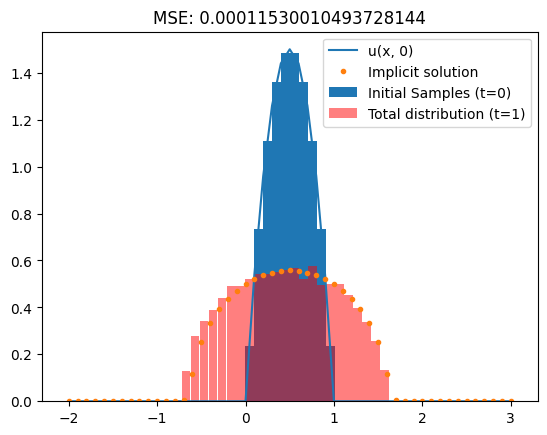

In [184]:
plt.plot(x_vals, y0, label='u(x, 0)')
# plt.hist(x_0_i, density=True, label='Initial samples')
# bins_0, heights_0, width_0 = my_hist(x_0_i, num_bins, weight_0 / N)
# plt.bar(x_vals_groups, initial_rho, width=(b-a)/num_bins, alpha=0.3, color='green', align='center', edgecolor='black', label='Initial Samples (t=0)')
plt.bar(x_vals_groups, initial_rho, width=(b-a)/K, label='Initial Samples (t=0)')


plt.plot(x_vals, yimp, '.', label='Implicit solution')

plt.bar(x_vals_groups, total_rho * initial_group_rho / M, width=(b-a)/K,
        alpha=0.5, color='red', label='Total distribution (t=1)')
# plt.hist(x_new, bins = num_bins, density=True, label='Total distribution')

plt.title(f'MSE: {error(yimp[1:], total_rho*initial_group_rho/M)}')

plt.legend()
# plt.show()
plt.savefig('results/unlinear_lagrangian_5.png')

# Двумерная линейная задача теплопроводности

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(x, y):
    return x*x + y*y

In [3]:
def plot3d(particles, N, D, K):
    x = particles[:, 0]
    y = particles[:, 1]
    
    hist, xedges, yedges = np.histogram2d(x, y, bins=K, density=True)
    
    
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like(xpos)
    
    dx = dy = (xedges[1] - xedges[0])
    dz = hist.flatten()
    
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='blue', alpha=0.7)

    # ax.view_init(elev=0, azim=90)
    
    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Density')
    ax.set_title('3D Histogram')
    
    plt.show()

In [4]:
N = 1000**2
D = 2
T = 100
K = 20

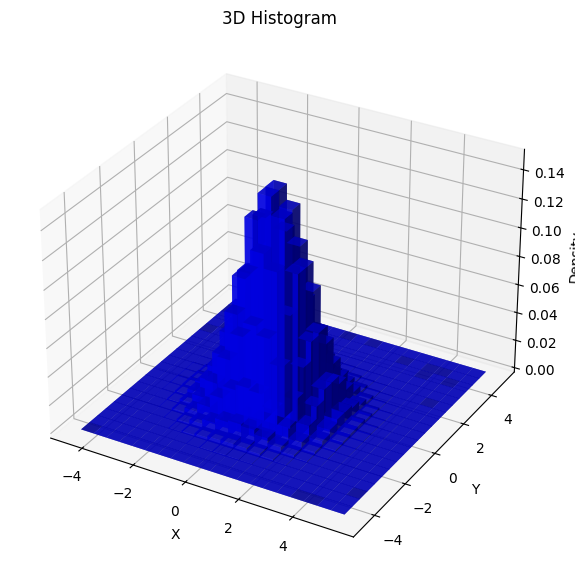

In [5]:
particles = np.random.normal(loc=0, scale=1, size=(N, D))

plot3d(particles, N, D, K)

In [6]:
dt = 1/T
new_particles = np.copy(particles)

for _ in range(T):
    new_particles = new_particles + np.random.normal(loc=0, scale=np.sqrt(2*dt), size=(N, D))

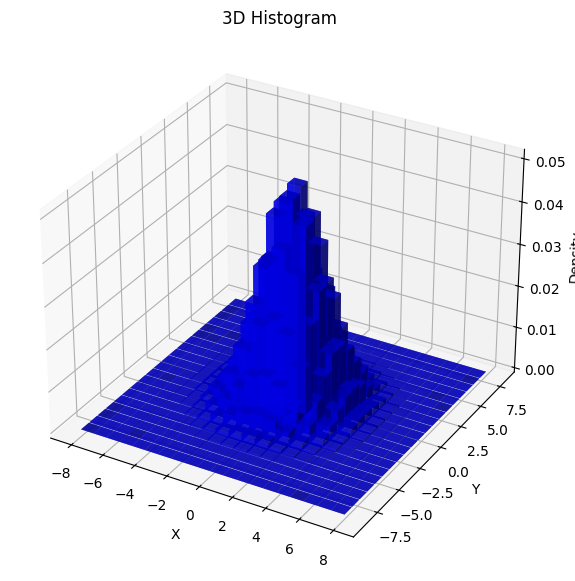

In [7]:
plot3d(new_particles, N, D, K)